# **Movie Genres Classification**
*Predicting the genre of movie from just 1000 characters of the script.*

*Dataset Link: https://www.kaggle.com/c/moviegenres/overview*

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv('kaggle_movie_train.csv')

# **Exploring the dataset**

In [3]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [4]:
df.shape

(22579, 3)

In [5]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [6]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

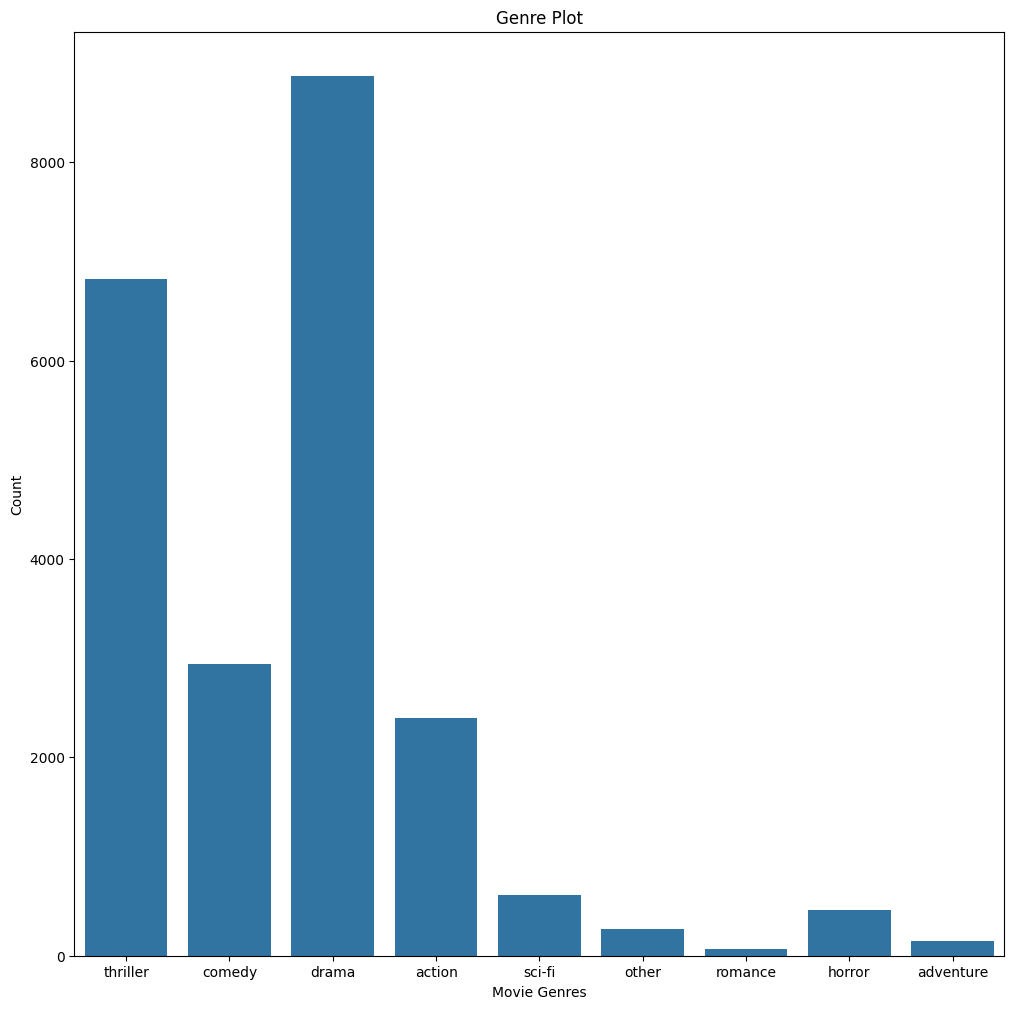

In [7]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

# **Data Cleaning and Preprocessing**

In [8]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [9]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [10]:
# Finding any NaN values
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [11]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [12]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Suraj
[nltk_data]     Khodade\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df.shape

(22579, 2)

In [14]:
# Cleaning the text (optimized)
corpus = []
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

for dialog in df['text']:
  # Remove special characters and lowercase
  dialog = re.sub(r'[^a-zA-Z]', ' ', dialog).lower()
  # Tokenize and remove stopwords
  words = [word for word in dialog.split() if word not in stop_words]
  # Stem and join
  cleaned = ' '.join(ps.stem(word) for word in words)
  corpus.append(cleaned)


In [15]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [16]:
df[df['genre']==4].index

Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,    16,
       ...
       22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574, 22575],
      dtype='int64', length=8873)

In [17]:
len(corpus)

22579

In [18]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

Note: you may need to restart the kernel to use updated packages.


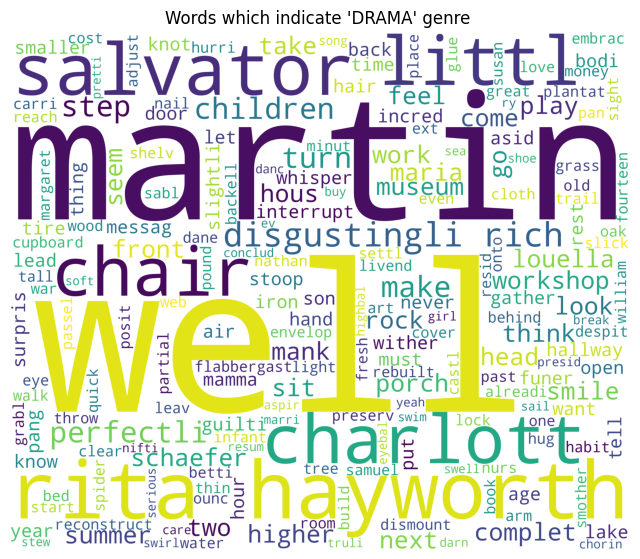

In [19]:
%pip install wordcloud

# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

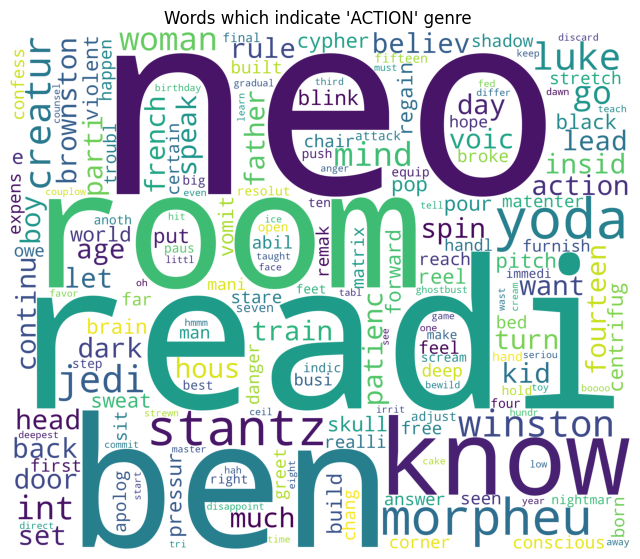

In [20]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

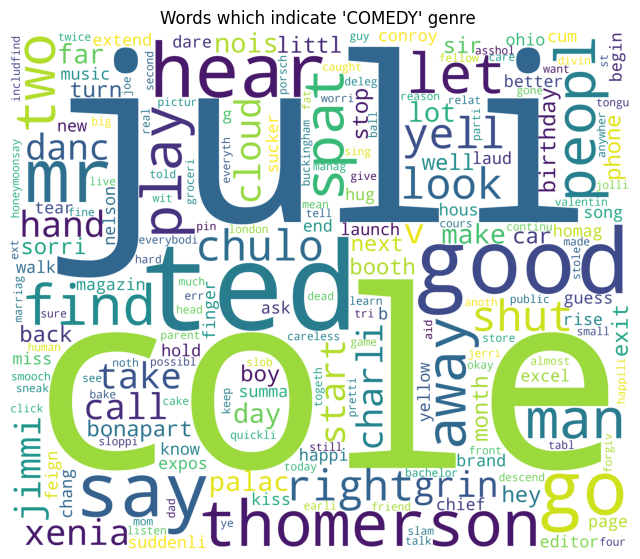

In [21]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [22]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [23]:
y = df['genre'].values

# **Model Building**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


## *Multinomial Naive Bayes*

In [25]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [26]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [27]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [29]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]],
      dtype=int64)

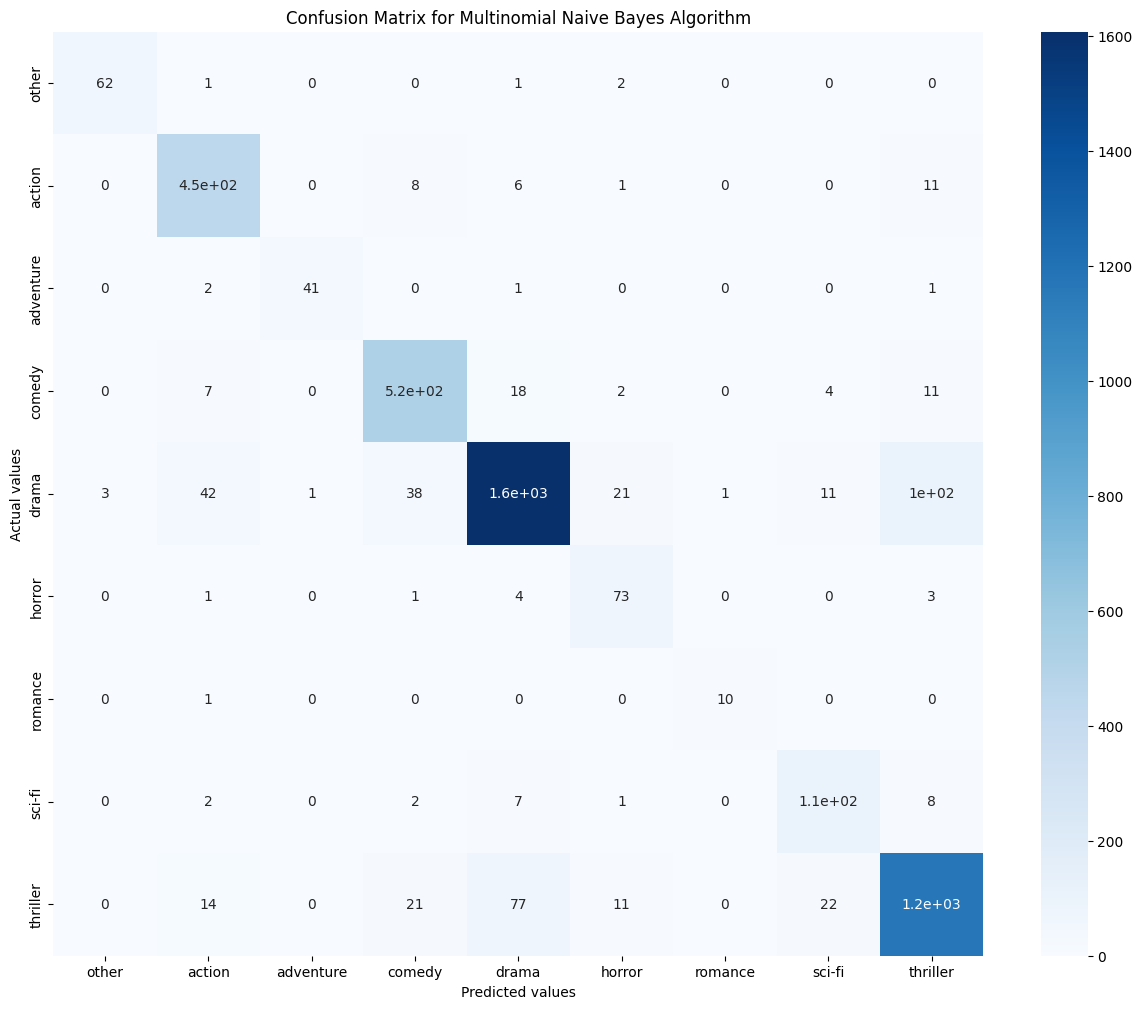

In [30]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [31]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%


KeyboardInterrupt: 

In [32]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

,alpha,0.1
,force_alpha,True
,fit_prior,True
,class_prior,None


# **Predictions**

In [33]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [34]:
# For generating random integer
from random import randint

In [35]:
# Loading test dataset
test = pd.read_csv('kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [36]:
test.shape

(5589, 2)

In [37]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [38]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: RY, relief flooding his face. Then HARRY'S P.O.V. the image MORPHS. Dorothea's beauty is replaced by primeval muck. ON HARRY, appalled. Dorothea grabs hold of him. DOROTHEA Harry. Listen to me. Whatever's good between us, believe it. Harry's face is deathly white, and pouring SWEAT. He's fighting the delirium. Or doing his best. HARRY ... oh... God... DOROTHEA I'm here, Harry. HARRY ...yes? DOROTHEA Yes. Nix steps from the shadows of the doorway behind Harry. NIX to Dorothea There you are, child. Harry starts to look round. DOROTHEA Don't look. HARRY I... have... to. NIX Come on, child. I want Swann to see you die. Harry turns and looks at Nix. HARRY'S P.O.V. Nix's face darkens as it MORPHS. And the flesh in the middle of his brow UNFOLDS, revealing a dark, pulsating THIRD EYE. NIX to Harry What are you looking at? ON DOROTHEA, who has gone to the door of the Meditation Room and now slips inside. ON HARRY, staring up at Nix. ON DOROTHEA, re emerging from the Meditation Room. In

In [39]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: the canal. It arcs down between the truck and John, hitting on its wheels. It bottoms out, an explosion of sparks under the frame. Only the ultra fast reflexes of a machine could keep the bike upright. Terminator fights for control. 47H He guns the throttle and the powerful bike roars up beside John's tiny Honda. Terminator sweeps the kid off his machine with one arm and swings him onto the Harley, in front of him. John's Honda weaves and falls, smashing instantly under thundering tires. The Harley roars ahead. It hits eighty. Ahead is an overpass, and supporting it is an abutment which bisects the canal into two channels. The Harley thunders into one channel, which is essentially a short tunnel. 47I The truck can't fit on either side. Neither can it stop, at that speed. Tires locked, it slides on the muddy concrete and piles into the concrete abutment at seventy. 47J Terminator and John emerge from the tunnel, looking back to see a fireball blasting through behind them as the 

In [40]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: icepicks over and over again A LOUD CRACKLING ELECTRIC SURGE on again, off again, in direct sync with the dimming of the lights. What makes it so especially unsettling is the noise that accompanies each Sledgehammer Surge a straining, strangulating CRY. A noise like a calf would make as its throat is slit. The light show be damned, Price leaps down the stairs, sprinting towards the Noise. INT. BASEMENT CORRIDOR CONTINUOUS likewise Dr. Blackburn INT. HALLWAY CONTINUOUS likewise Sara and Eddie, running as fast as they can INT. BASEMENT GALLERY CONTINUOUS Price spies Blackburn at the other end of a Corridor, shouts over the Noise to him PRICE Where is it?? BLACKBURN I don't know!! Sara and Eddie appear, spot them Sara shouts SARA What is it?? PRICE Something with the power, I don't know!! And then Pritchett is seen at the far end of another Corridor. PRITCHETT It's down there! He's pointing to a long corridor a light strobes at the end. EDDIE What's down there? PRITCHETT awe struc

In [41]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: and introduces itself. Annabelle rehearing her line over and over. ANNABELLE quot Hello! I am Maze. But you can call me Corn. Hello! I am... quot Inside her costume, her breathing is sharp. She stands very straight, very bold. A brazen ear of corn. She steps forward. ANNABELLE quot Hello! I am... Rachel POPS UP next to the stage with her huge PROFESSIONAL CAMERA and giant flash. Her camera FLASHES three times, quickly. After each flash, we see the picture for a split second, Annabelle. A TERRIFIED ear of corn. A LOST ear of corn. ANNABELLE blinks, disoriented Um...I'm...I'm...Oh... In the audience, Jackie is willing her daughter a recovery. Sees instead, a completely DEVASTATED ear of corn. ANNABELLE exploding in tears Oh forget it! She runs offstage amidst laughter and applause. Luke looks over at Jackie but she and Ben have already left their seats. EXT. AUDITORIUM FOYER NIGHT Jackie comforts Annabelle. Ben watches closely, getting caught up in his sister's sadness. Luke and 

In [42]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: necological table abandoned by Hobbes. Rollo is using it as an auxiliary desk. On the table are several opened waxed paper packages of beef knishes and accessories. There are also several old cardboard shoeboxes, some still tied with string, some opened and overflowing with papers of all kinds Hobbes's private notes. ROLLO eating a knish Yeah, well, I'm flattered, but you won't find any real meat in them. ST. LUC V.O. No? How come? ROLLO shuffling papers Listen, Rog. I knew Hobbes was funny, you know? I told you that. But I didn't really know just how funny he was. See... when he kicked off, they sent all the personal secret stuff they found to his mother she's still alive but just barely and she sent everything she thought was medical to me here at the lab. I'm Hobbes's partner, right? laughs sardonically Anyway, I've been going through his papers, and what they add up to is this Hobbes was shafting us all, me, the university, the foundations and the councils, the private labs